In [85]:
import numpy as np
import pandas as pd
import seaborn as sb

attackers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_attackers.csv');
attackers.rename(columns={"Faults": "FaultsSpike"}, inplace=True)
attackers.rename(columns={"Total attempts": "Total_attempts_spike"}, inplace=True)
attackers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

blockers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_blockers.csv');
blockers.rename(columns={"Faults": "FaultsBlock"}, inplace=True)
blockers.rename(columns={"Total Attempts": "Total_attempts_block"}, inplace=True)
blockers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

setters = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_setters.csv');
setters.rename(columns={"Faults": "FaultsSet"}, inplace=True)
setters.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

servers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_servers.csv');
servers.rename(columns={"Faults": "FaultsServe"}, inplace=True)
servers.rename(columns={"Total attempts": "Total_attempts_serve"}, inplace=True)
servers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

recievers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_recievers.csv');
recievers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

diggers = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_diggers.csv');
diggers.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)

scores = pd.read_csv('C:/Users/asus tuf/Downloads/men_best_scores.csv');
scores.drop(["Rank", "ShirtNumber"], axis = 1, inplace=True)
scores["Total_Attempts"] = attackers["Total_attempts_spike"] + blockers["Total_attempts_block"] + servers["Total_attempts_serve"]
scores["Total_fault"] = attackers["FaultsSpike"] + blockers["FaultsBlock"] + servers["FaultsServe"]

best_defenser = pd.merge(recievers, diggers, on=["Name", "Team"])

best_scorer = pd.merge(scores, attackers, on=["Name", "Team"])
best_scorer = pd.merge(best_scorer, servers, on=["Name", "Team"])
best_scorer = pd.merge(best_scorer, blockers, on=["Name", "Team"])

best_scorer

,Name,Team,Attacks,Blocks,Serves,Total,Total_Attempts,Total_fault,Spikes,FaultsSpike,...,Aces,FaultsServe,Hits,Total_attempts_serve,Average per set,Stuff Blocks,FaultsBlock,Rebounds,Total_attempts_block,Average Per Set
0,Amir Ghafour,IRI,214,21,14,249,656.0,150.0,214,59,...,14,51,137,202,0.23,21,32,37,90,0.34
1,Yuji Nishida,JPN,183,13,23,219,748.0,179.0,183,69,...,23,41,124,188,0.39,13,34,23,70,0.22
2,Ricardo Lucarelli Souza,BRA,173,14,23,210,736.0,168.0,173,54,...,23,33,175,231,0.30,14,41,27,82,0.18
3,Simon Hirsch,GER,170,21,13,204,551.0,116.0,170,55,...,13,45,119,177,0.20,21,41,28,90,0.33
4,Yoandy Leal Hidalgo,BRA,161,22,19,202,617.0,129.0,161,58,...,19,52,130,201,0.25,22,43,35,100,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Benjamin Toniutti,FRA,1,1,0,2,54.0,14.0,1,1,...,0,3,73,76,NaN,1,11,23,35,0.02
243,Luca Spirito,ITA,2,0,0,2,77.0,17.0,2,0,...,0,1,6,7,NaN,0,1,2,3,NaN
244,Andrija Vilimanovic,SRB,2,0,0,2,41.0,7.0,2,0,...,0,7,15,22,NaN,0,4,4,8,NaN
245,Morteza Sharifi,IRI,1,0,0,1,49.0,10.0,1,1,...,0,1,0,1,NaN,0,0,2,2,NaN


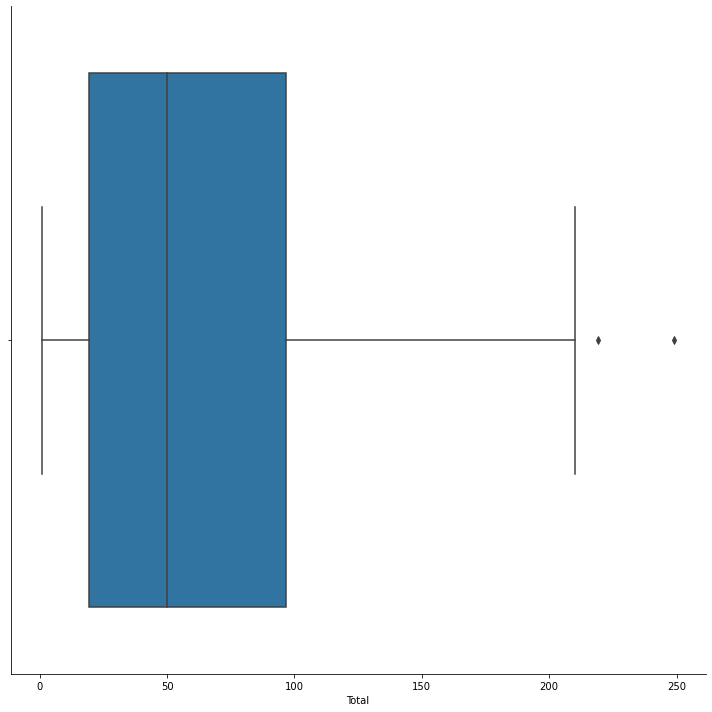

In [89]:
sb.catplot(x='Total', data=best_scorer, kind='box', height=10)

In [90]:
best_scorer.describe()

,Attacks,Blocks,Serves,Total,Total_Attempts,Total_fault,Spikes,FaultsSpike,Shots,Total_attempts_spike,...,Aces,FaultsServe,Hits,Total_attempts_serve,Average per set,Stuff Blocks,FaultsBlock,Rebounds,Total_attempts_block,Average Per Set
count,247.000000,247.000000,247.000000,247.000000,246.000000,246.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,204.000000,247.000000,247.000000,247.000000,247.000000,230.000000
mean,50.874494,8.874494,5.024291,64.773279,246.394309,57.000000,50.874494,16.757085,36.659919,104.291498,...,5.024291,17.052632,68.591093,90.668016,0.097794,8.874494,23.599190,21.242915,53.716599,0.151391
std,46.242165,7.572712,4.822818,53.625671,155.577276,39.103943,46.242165,17.240459,33.598020,94.811088,...,4.822818,12.856038,44.079921,55.879108,0.073428,7.572712,17.337318,16.282993,39.455757,0.116405
min,0.000000,0.000000,0.000000,1.000000,21.000000,3.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,10.500000,3.000000,1.000000,19.500000,140.500000,28.000000,10.500000,3.000000,8.500000,25.000000,...,1.000000,6.000000,31.500000,43.000000,0.040000,3.000000,10.000000,8.000000,22.500000,0.050000
50%,38.000000,7.000000,4.000000,50.000000,204.000000,49.000000,38.000000,11.000000,28.000000,77.000000,...,4.000000,14.000000,62.000000,90.000000,0.080000,7.000000,20.000000,17.000000,44.000000,0.120000
75%,74.500000,13.000000,8.000000,96.500000,310.000000,73.000000,74.500000,26.000000,52.500000,154.500000,...,8.000000,25.000000,101.000000,128.000000,0.132500,13.000000,35.000000,30.000000,79.500000,0.220000
max,214.000000,33.000000,28.000000,249.000000,748.000000,185.000000,214.000000,71.000000,131.000000,393.000000,...,28.000000,59.000000,197.000000,233.000000,0.410000,33.000000,81.000000,85.000000,187.000000,0.530000
